Рассмотрим задачу сингулярно - возмущенной системы — модель
двухлампового генератора Фрюгауфа:
$$\epsilon \frac{dx^1}{dt} = -1.2(y^1-y^2)-tg\frac{\pi x^1}{2}-x^2$$
$$\epsilon \frac{dx^2}{dt} = 1.2(y^1-y^2)-tg\frac{\pi x^2}{2}-x^1$$
$$\frac{dy^1}{dt} = x^1$$
$$\frac{dy^2}{dt} = x^2$$
$$x^1(0)=x^2(0)=0, y^1 = 2, y^2 = 0, T=20, \epsilon = 10^{-3}, 10^{-5}$$

Система жесткая и состоит из быстрого движений, задаваемых:
$$\epsilon \frac{dx^1}{dt} = -1.2(y^1-y^2)-tg\frac{\pi x^1}{2}-x^2$$
$$\epsilon \frac{dx^2}{dt} = 1.2(y^1-y^2)-tg\frac{\pi x^2}{2}-x^1,$$
вектор $(x_1,x_2)$ меняется быстро,

и медленного движения - вектор $(y_1, y_2)$ почти не меняется.

Воспользуемся одностадийным методом Розенброка:
$$u_{k+1} = u_k + p_1 k_1$$
$$D_n k_1 = hf(u_n)$$
$$D_n = E - ahf_n'(y_n)$$
$$a = 1, p_1 = 1$$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
from cmath import pi
from math import tan
from math import cos

In [2]:
def yakobi(u):
    ans = np.matrix([[-pi/2.*(cos(pi*u[0]/2.))**(-2), -1., -1.2, 1.2], [-1., -pi/2.*(cos(pi*u[1]/2.))**(-2), 1.2, -1.2], [1., 0., 0., 0.], [0., 1., 0., 0.]])
    return ans

In [3]:
def f(u):
    if u[0]>1:
        u[0] = 1-1e-3
    if u[0]<-1:
        u[0] = -1+1e-3
    if u[1]>1:
        u[1] = 1-1e-3
    if u[1]<-1:
        u[1]=-1+1e-3
    u1 = [0,0,0,0]
    u1[0] = (-1.2*(u[2]-u[3])-tan(pi*u[0]/2.)-u[1])/eps
    u1[1] = (1.2*(u[2]-u[3])-tan(pi*u[1]/2.)-u[0])/eps
    u1[2] = u[0]
    u1[3] = u[1]
    return np.array(u1)

In [4]:
from numpy.linalg import solve

In [5]:
E = np.matrix([[1.,0.,0.,0.], [0.,1.,0.,0.],[0.,0.,1.,0.],[0.,0.,0.,1.]])

In [6]:
def findk(u, h):
    A = E - h*yakobi(u)
    b = h*f(u)
    return solve(A,b)

In [7]:
t = np.linspace(0,20,10**6+1)
h = 20./10**6 #берем шаг меньше эпсилон
eps = 1e-3

In [8]:
x1 = []
x2 = []
y1 = []
y2 = []
u0 = [0.0, 0.0, 2., 0.0]
ui = np.array(u0)
for i in t:
    x1.append(ui[0])
    x2.append(ui[1])
    y1.append(ui[2])
    y2.append(ui[3])
    ui = ui + findk(ui, h)

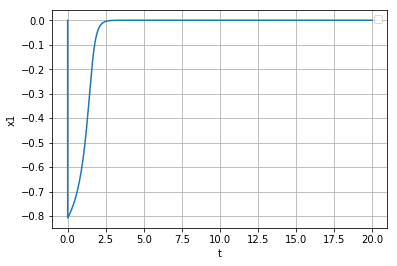

In [9]:
plt.plot(t,x1)
plt.grid()
plt.xlabel('t')
plt.ylabel('x1')
plt.legend()
plt.show()

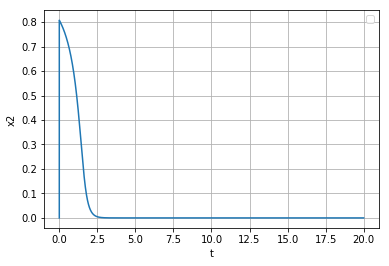

In [10]:
plt.plot(t,x2)
plt.grid()
plt.xlabel('t')
plt.ylabel('x2')
plt.legend()
plt.show()

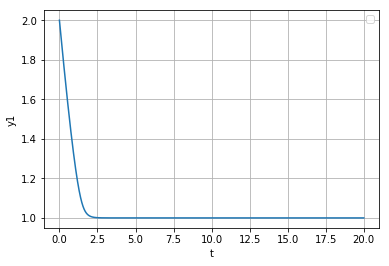

In [11]:
plt.plot(t,y1)
plt.grid()
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

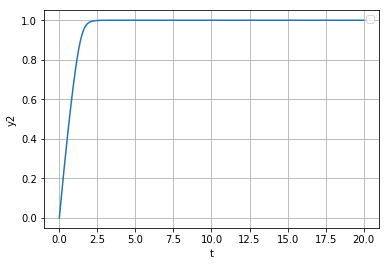

In [12]:
plt.plot(t,y2)
plt.grid()
plt.xlabel('t')
plt.ylabel('y2')
plt.legend()
plt.show()

In [13]:
from tqdm import tqdm_notebook

In [16]:
t = np.linspace(0,20,2*10**7+1)
h = 20./2/10**7

In [17]:
eps = 1e-5

In [18]:
x1 = []
x2 = []
y1 = []
y2 = []
u0 = [0.0, 0.0, 2., 0.0]
ui = np.array(u0)
for i in tqdm_notebook(t):
    x1.append(ui[0])
    x2.append(ui[1])
    y1.append(ui[2])
    y2.append(ui[3])
    ui = ui + findk(ui, h)


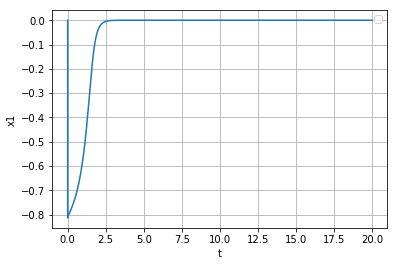

In [19]:
plt.plot(t,x1)
plt.grid()
plt.xlabel('t')
plt.ylabel('x1')
plt.legend()
plt.show()

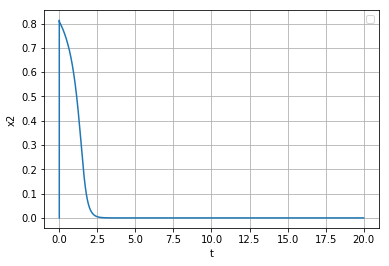

In [20]:
plt.plot(t,x2)
plt.grid()
plt.xlabel('t')
plt.ylabel('x2')
plt.legend()
plt.show()

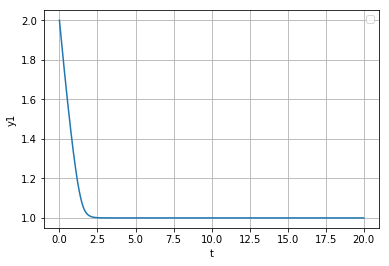

In [21]:
plt.plot(t,y1)
plt.grid()
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

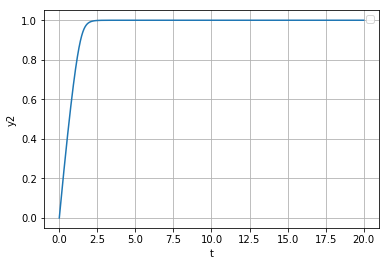

In [22]:
plt.plot(t,y2)
plt.grid()
plt.xlabel('t')
plt.ylabel('y2')
plt.legend()
plt.show()

Чем меньше $\epsilon$ тем более маленький шаг h надо брать

для большого шага получаем:

In [23]:
t = np.linspace(0,20,10**5+1)
h = 20./10**5
eps = 1e-5

In [26]:
x1 = []
x2 = []
y1 = []
y2 = []
u0 = [0.0, 0.0, 2., 0.0]
ui = np.array(u0)
for i in tqdm_notebook(t):
    x1.append(ui[0])
    x2.append(ui[1])
    y1.append(ui[2])
    y2.append(ui[3])
    ui = ui + findk(ui, h)

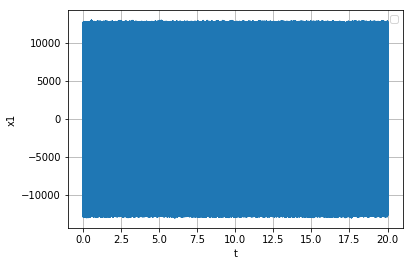

In [27]:
plt.plot(t,x1)
plt.grid()
plt.xlabel('t')
plt.ylabel('x1')
plt.legend()
plt.show()

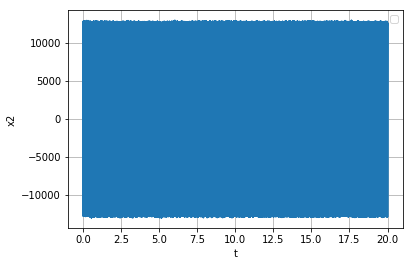

In [28]:
plt.plot(t,x2)
plt.grid()
plt.xlabel('t')
plt.ylabel('x2')
plt.legend()
plt.show()

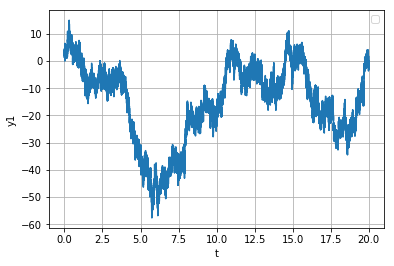

In [29]:
plt.plot(t,y1)
plt.grid()
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

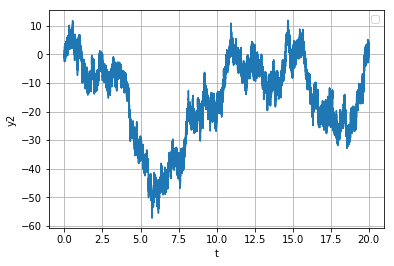

In [30]:
plt.plot(t,y2)
plt.grid()
plt.xlabel('t')
plt.ylabel('y2')
plt.legend()
plt.show()